In [1]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

# !pip install --upgrade mssuite
# !pip install pandas
# !pip install numpy
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install scipy
# !pip install --upgrade git+https://github.com/science64/DynaTMT-py-SB.git # This is my repository (Süleyman) that I am updating!

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB.DynaTMT as mePROD
#import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [2]:
wd = "Example data" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_SB_CCCP+ISRIB_Import_PSMs.txt"

psms = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# psms = pd.read_excel(f'{wd}/{dataName}', sep='\t', header=0) #  EXCEL file: you provide your .xlsx  PSM or peptide file here.

# print(psms.dtypes)

In [130]:
for column in psms.columns:
    unique_count = psms[column].nunique()
    print(f'{column}: {unique_count} unique values')

PSMs Workflow ID: 1 unique values
PSMs Peptide ID: 203381 unique values
Checked: 1 unique values
Confidence: 1 unique values
Identifying Node: 1 unique values
PSM Ambiguity: 1 unique values
Annotated Sequence: 78139 unique values
Modifications: 6226 unique values
# Proteins: 14 unique values
Master Protein Accessions: 7378 unique values
Protein Accessions: 7485 unique values
# Missed Cleavages: 3 unique values
Charge: 6 unique values
DeltaScore: 8865 unique values
DeltaCn: 1 unique values
Rank: 1 unique values
Search Engine Rank: 1 unique values
m/z [Da]: 198432 unique values
MH+ [Da]: 199790 unique values
Theo. MH+ [Da]: 74930 unique values
DeltaM [ppm]: 1620 unique values
Deltam/z [Da]: 1440 unique values
Activation Type: 1 unique values
MS Order: 1 unique values
Isolation Interference [%]: 111460 unique values
Average Reporter S/N: 3935 unique values
Ion Inject Time [ms]: 64478 unique values
RT [min]: 194839 unique values
First Scan: 80665 unique values
Spectrum File: 8 unique value

In [132]:
wd = r"C:\Users\Predator\PowerFolders\Import and Translation 2020Fasta\SB125-126 CCCP+ISRIB\Import" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_MAA_SB_126_CCCP+ISRIB_Import (_PeptideGroups.txt"

peptides = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.


In [133]:
for column in peptides.columns:
    unique_count = peptides[column].nunique()
    print(f'{column}: {unique_count} unique values')

Peptide Groups Peptide Group ID: 92106 unique values
Checked: 1 unique values
Confidence: 1 unique values
Annotated Sequence: 54239 unique values
Modifications: 6161 unique values
Contaminant: 2 unique values
Qvality PEP: 5261 unique values
Qvality q-value: 386 unique values
# Protein Groups: 11 unique values
# Proteins: 15 unique values
# PSMs: 40 unique values
Master Protein Accessions: 7415 unique values
Positions in Master Proteins: 54184 unique values
Modifications in Master Proteins: 2 unique values
# Missed Cleavages: 3 unique values
Theo. MH+ [Da]: 74930 unique values
Abundances (Normalized): F2: 126, Sample: 21770 unique values
Abundances (Normalized): F2: 127N, Sample: 21063 unique values
Abundances (Normalized): F2: 127C, Sample: 21092 unique values
Abundances (Normalized): F2: 128N, Sample: 21104 unique values
Abundances (Normalized): F2: 128C, Sample: 21347 unique values
Abundances (Normalized): F2: 129N, Sample: 21310 unique values
Abundances (Normalized): F2: 129C, Sampl

In [4]:
# abundance_columns = [col for col in psms.columns if 'Abundance:' in col]
# abundance_df = psms[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT Channels")
# plt.tight_layout()
# plt.show()

In [3]:
# we are removing booster channel which is 131C
psms = psms.drop('Abundance: 131C', axis=1) #booster test we do not drop it

In [3]:
process = mePROD.PD_input() # we do not need to give our psms here anymore. Just define the Class called process here and we will use the functions from it!

# IT adjusment, you should do if you are using TMD method and using PSM file
IT_adjusted = process.IT_adjustment(psms)

# abundance_columns = [col for col in IT_adjusted.columns if 'Abundance:' in col]
# abundance_df = IT_adjusted[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT Channels")
# plt.tight_layout()
# plt.show()

Calling function: IT_adjustment
IT adjustment done!


In [4]:
# it will filter peptides (PSMs) which contains empty values (complete empty values for entire TMT channels), contaminations and shared peptides (which contains ; in them).
filter_data = process.filter_peptides(IT_adjusted)

# abundance_columns = [col for col in filter_data.columns if 'Abundance:' in col]
# abundance_df = filter_data[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT Channels")
# plt.tight_layout()
# plt.show()

Calling function: filter_peptides
Filtering done!


In [5]:
# for total intenstiy normalization
sumNorm = process.total_intensity_normalisation(filter_data)

# abundance_columns = [col for col in sumNorm.columns if 'Abundance:' in col]
# abundance_df = sumNorm[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT channels")
# plt.tight_layout()
# plt.show()

Calling function: total_intensity_normalisation
Total intensity normalisation done!


In [6]:
heavy = process.extract_heavy(sumNorm)
# abundance_columns = [col for col in heavy.columns if 'Abundance:' in col]
# abundance_df = heavy[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT channels")
# plt.tight_layout()
# plt.show()

Calling function: extract_heavy
Extraction Done Extracted Heavy Peptides: 72814


In [9]:
heavy

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,487.990112,491.080966,196.307132,486.741066,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,137.097419,102.422846,187.678247,1060.132739,NaN,2.49,1,False,0.000553,6.554000e-03
13,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,511.958192,461.817296,463.802564,476.043460,NaN,1.17,1,False,0.004953,8.003000e-02
15,-814,1161,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,338.429292,263.373032,429.287025,317.718894,NaN,1.03,1,False,0.001733,4.377000e-02
20,-814,1648,False,High,Sequest HT (A2),Unambiguous,[R].rQHEAEEGVr.[R],N-Term(TMT6plex); R10(Label:13C(6)15N(4)),1,Q15149,...,43.142544,53.954892,110.018283,87.720368,NaN,2.79,1,False,0.002301,5.162000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,352.810140,424.323219,338.683733,409.718304,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,113.419618,171.606443,281.605807,124.373654,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,27.802973,35.665098,53.930531,67.394917,NaN,1.08,1,False,0.001805,4.486000e-02
203370,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,51.771053,82.304073,50.694699,79.162283,NaN,2.27,1,False,0.000008,8.630000e-05


Calling function: baseline_correction_peptide_return
    Abundance: 126  Abundance: 127N  Abundance: 127C  Abundance: 128N  \
1              0.0       124.410090        21.360497       195.586263   
6              0.0         0.481074         0.494589         0.155058   
13             0.0        19.877118         0.392270         0.841230   
15             NaN              NaN              NaN              NaN   
20             NaN              NaN              NaN              NaN   

    Abundance: 128C  Abundance: 129N  Abundance: 129C  Abundance: 130N  \
1        168.748470       272.893184       260.226311       263.313849   
6          0.640703        50.648432         0.613624         0.833632   
13         0.768165         0.597824         0.203871         0.992078   
15              NaN              NaN              NaN              NaN   
20              NaN              NaN              NaN              NaN   

    Abundance: 130C  Abundance: 131N  Abundance: 131C  
1      

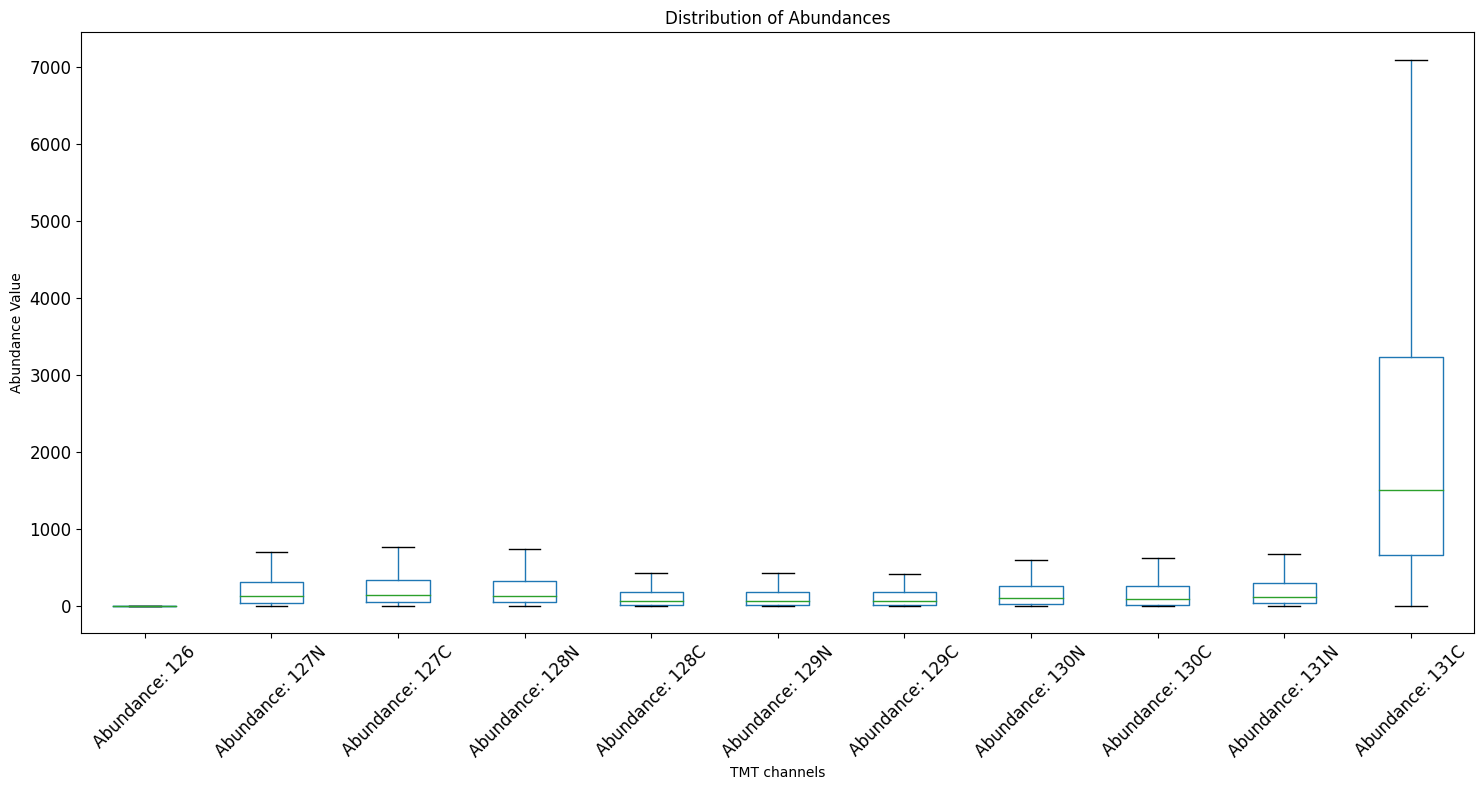

In [8]:
# has a lot of problem 
peptide_data = process.baseline_correction_peptide_return(heavy, random=True, threshold=5, i_baseline=0)

abundance_columns = [col for col in peptide_data.columns if 'Abundance:' in col]
abundance_df = peptide_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
print(abundance_df.head())
print(len(peptide_data))

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

    Abundance: 126  Abundance: 127N  Abundance: 127C  Abundance: 128N  \
1              0.0       124.408310        21.361112       195.586337   
6              0.0         0.481074         0.494589         0.155058   
31             0.0        36.395809        46.517026        60.704932   
48             0.0       526.410559       631.859222       515.664530   
59             0.0        38.846637         0.921083        10.636813   

    Abundance: 128C  Abundance: 129N  Abundance: 129C  Abundance: 130N  \
1        168.747363       272.893109       260.225847       263.316701   
6          0.640703        50.648092         0.613624         0.833632   
31        45.481996        14.677960        14.567742        10.041509   
48       339.441858       314.730953       242.683297       455.971107   
59         9.878303        33.736741         0.942615         0.703324   

    Abundance: 130C  Abundance: 131N  
1          0.955665       258.976800  
6         28.817457       901.271949  

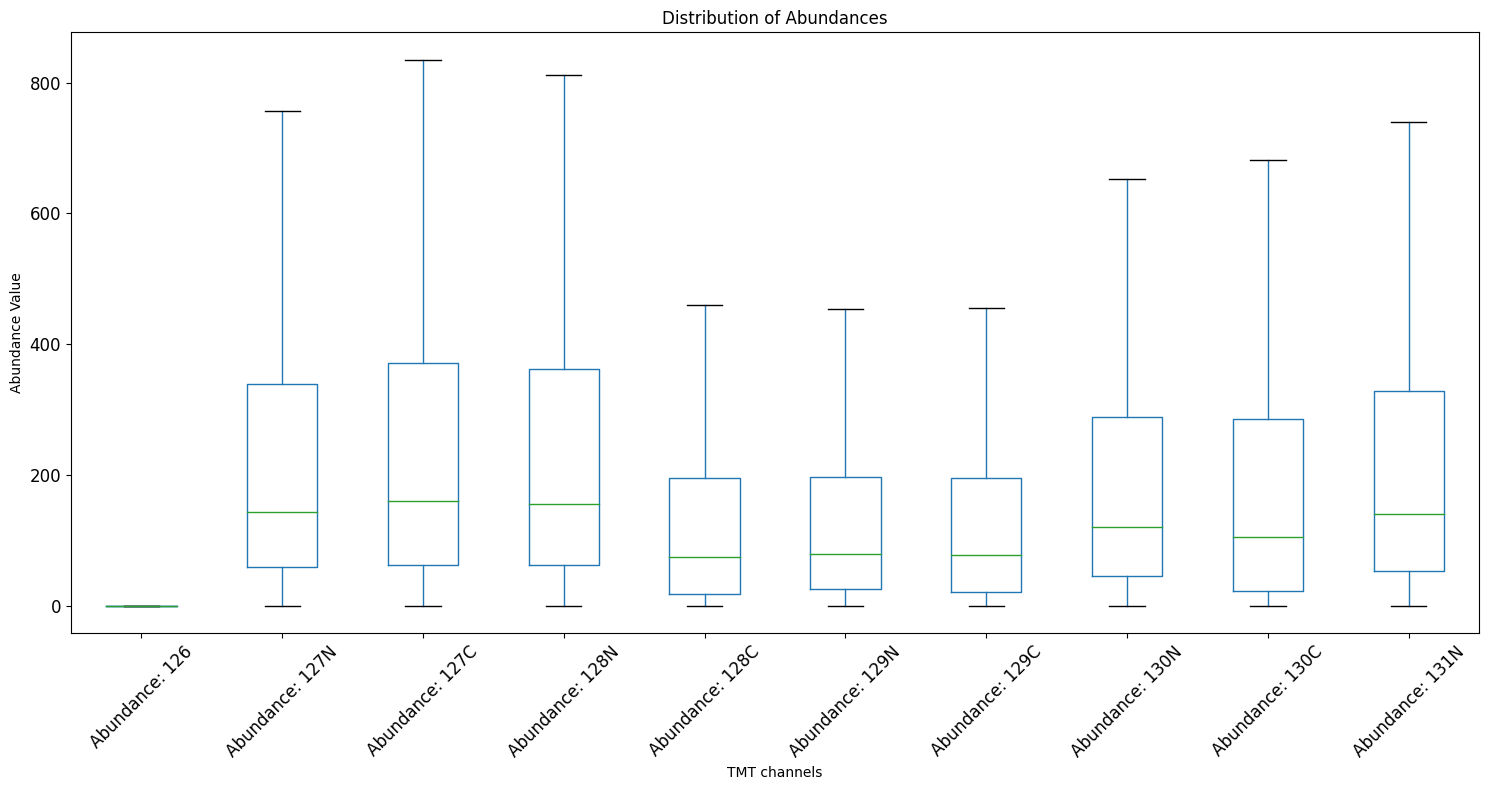

In [21]:
# 1. Replace NaN values with 0 in specific columns
abundance_columns = [col for col in peptide_data.columns if 'Abundance:' in col]
peptide_data[abundance_columns] = peptide_data[abundance_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# 2. Calculate the sum of each row for specific columns and add it as a new column 'sum'
peptide_data['sum'] = peptide_data[abundance_columns].sum(axis=1)

# 3. Remove rows where 'sum' is 0
peptide_data_cleaned = peptide_data[peptide_data['sum'] != 0].copy()

# 4. Drop the 'sum' column if it's not needed in the final output
peptide_data_cleaned = peptide_data_cleaned.drop(columns=['sum'])

abundance_columns = [col for col in peptide_data_cleaned.columns if 'Abundance:' in col]
abundance_df = peptide_data_cleaned[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
print(abundance_df.head())
print(len(peptide_data_cleaned))

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [22]:
peptide_data_cleaned

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,260.225847,263.316701,0.955665,258.976800,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,0.613624,0.833632,28.817457,901.271949,NaN,2.49,1,False,0.000553,6.554000e-03
31,-814,2142,False,High,Sequest HT (A2),Unambiguous,[K].aHEEANAAr.[K],N-Term(TMT6plex); R9(Label:13C(6)15N(4)),1,O43395,...,14.567742,10.041509,37.942778,82.783129,NaN,1.35,1,False,0.003812,6.757000e-02
48,-814,2462,False,High,Sequest HT (A2),Unambiguous,[R].qrDPEDSQr.[T],N-Term(TMT6plex); R2(Label:13C(6)15N(4)); R9(L...,1,Q17RY6,...,242.683297,455.971107,548.183414,601.949179,NaN,3.61,1,False,0.000008,1.812000e-04
59,-814,2646,False,High,Sequest HT (A2),Unambiguous,[R].eQGTESr.[S],N-Term(TMT6plex); R7(Label:13C(6)15N(4)),1,P42166,...,0.942615,0.703324,6.916270,5.412858,NaN,1.40,1,False,0.001193,3.218000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203361,-814,3727946,False,High,Sequest HT (A2),Unambiguous,[K].gAEATLPTVIAELQQFLr.[G],N-Term(TMT6plex); R18(Label:13C(6)15N(4)),1,Q8TEQ8,...,167.133961,99.263519,306.658249,136.014112,NaN,3.26,1,False,0.000648,8.120000e-03
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,0.796518,46.311097,0.212150,31.706183,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,50.956227,109.143053,219.142416,61.910264,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,0.286130,0.589785,10.865859,24.330245,NaN,1.08,1,False,0.001805,4.486000e-02


In [11]:
peptide_data

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,260.225847,263.316701,0.955665,258.976800,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,0.613624,0.833632,28.817457,901.271949,NaN,2.49,1,False,0.000553,6.554000e-03
13,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,NaN,NaN,NaN,NaN,NaN,1.17,1,False,0.004953,8.003000e-02
15,-814,1161,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,NaN,NaN,NaN,NaN,NaN,1.03,1,False,0.001733,4.377000e-02
20,-814,1648,False,High,Sequest HT (A2),Unambiguous,[R].rQHEAEEGVr.[R],N-Term(TMT6plex); R10(Label:13C(6)15N(4)),1,Q15149,...,NaN,NaN,NaN,NaN,NaN,2.79,1,False,0.002301,5.162000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,0.796518,46.311097,0.212150,31.706183,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,50.956227,109.143053,219.142416,61.910264,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,0.286130,0.589785,10.865859,24.330245,NaN,1.08,1,False,0.001805,4.486000e-02
203370,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,NaN,NaN,NaN,NaN,NaN,2.27,1,False,0.000008,8.630000e-05


In [15]:
peptide_data.to_excel('Peptide_data.xlsx')

Calling function: baseline_correction
Baseline correction done!
    Abundance: 126  Abundance: 127N  Abundance: 127C  Abundance: 128N  \
1              0.0       124.410090        21.360497       195.586263   
6              0.0         0.481074         0.494589         0.155058   
13             0.0        19.877118         0.392270         0.841230   
15             NaN              NaN              NaN              NaN   
20             NaN              NaN              NaN              NaN   

    Abundance: 128C  Abundance: 129N  Abundance: 129C  Abundance: 130N  \
1        168.748470       272.893184       260.226311       263.313849   
6          0.640703        50.648432         0.613624         0.833632   
13         0.768165         0.597824         0.203871         0.992078   
15              NaN              NaN              NaN              NaN   
20              NaN              NaN              NaN              NaN   

    Abundance: 130C  Abundance: 131N  Abundance: 131

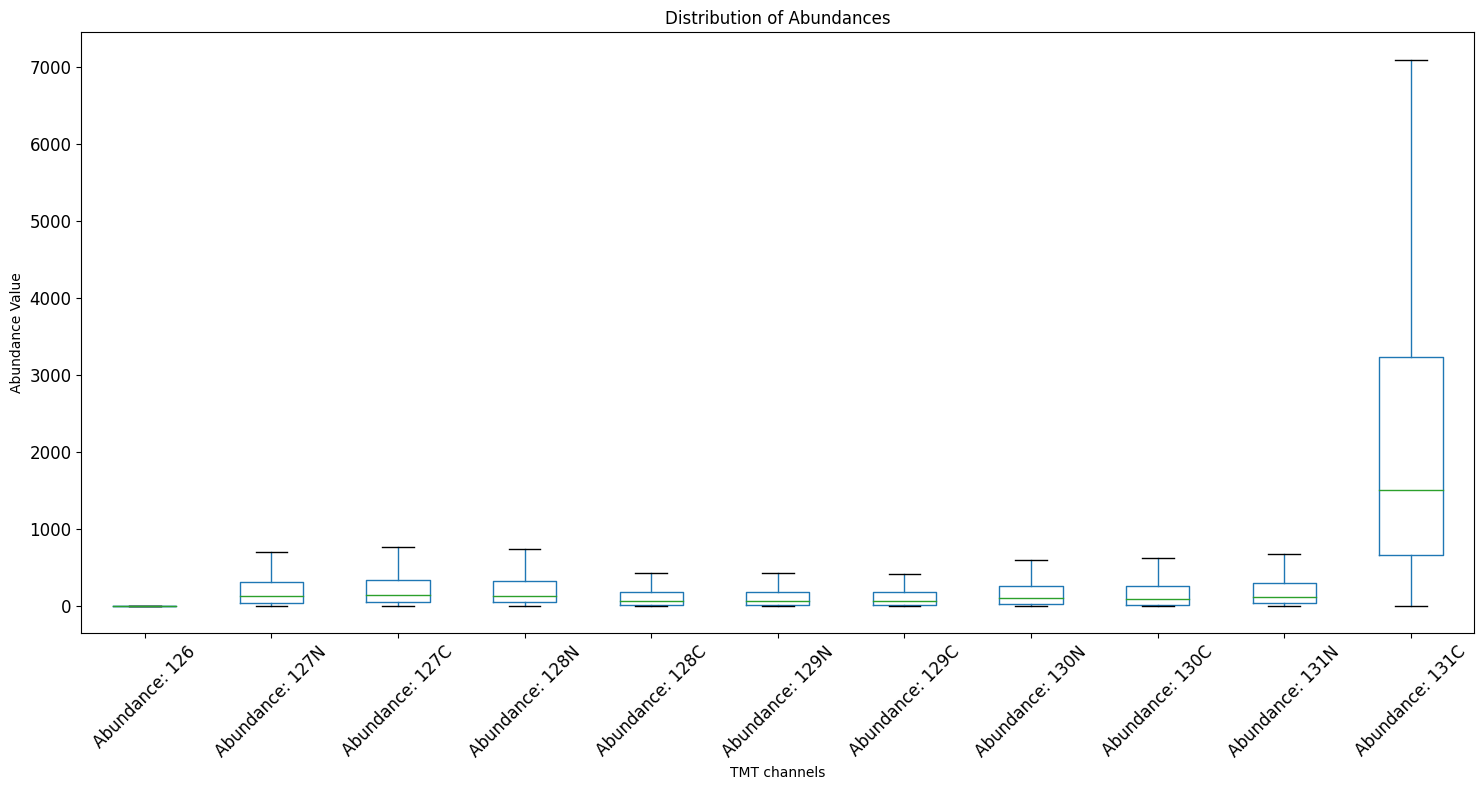

In [9]:
peptide_data2 = process.baseline_correction(heavy, threshold=5, i_baseline=0, method='sum')

abundance_columns = [col for col in peptide_data2.columns if 'Abundance:' in col]
abundance_df = peptide_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Displaying the first few rows of the extracted abundance columns
print(abundance_df.head())
print(len(peptide_data2))

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [23]:
for column in heavy.columns:
    unique_count = heavy[column].nunique()
    print(f'{column}: {unique_count} unique values')

PSMs Workflow ID: 1 unique values
PSMs Peptide ID: 72814 unique values
Checked: 1 unique values
Confidence: 1 unique values
Identifying Node: 1 unique values
PSM Ambiguity: 1 unique values
Annotated Sequence: 35177 unique values
Modifications: 3704 unique values
# Proteins: 6 unique values
Master Protein Accessions: 5466 unique values
Protein Accessions: 5522 unique values
# Missed Cleavages: 3 unique values
Charge: 4 unique values
DeltaScore: 7984 unique values
DeltaCn: 1 unique values
Rank: 1 unique values
Search Engine Rank: 1 unique values
m/z [Da]: 71539 unique values
MH+ [Da]: 71796 unique values
Theo. MH+ [Da]: 30799 unique values
DeltaM [ppm]: 1376 unique values
Deltam/z [Da]: 1219 unique values
Activation Type: 1 unique values
MS Order: 1 unique values
Isolation Interference [%]: 40836 unique values
Average Reporter S/N: 2587 unique values
Ion Inject Time [ms]: 34046 unique values
RT [min]: 71652 unique values
First Scan: 49608 unique values
Spectrum File: 8 unique values
File

In [10]:
def baseline_correction(input_file, random = True, threshold = 5, i_baseline = 0, include_negatives = False):
    random_float = np.random.RandomState(69) # random seed for NaN, empty or 0 values.

    # determine the channels
    channels = [col for col in input_file.columns if 'Abundance:' in col]

    # sometimes PD created different names so if channels column is empty, it will check here again.
    if channels == []:
        channels = [col for col in input_file.columns if 'Abundance' in col]

    # channels and 'Modifications', 'Master Protein Accessions', 'Annotated Sequence' are required for further analysis for baseline correction.
    PSMs = input_file[channels +  ['Modifications', 'Master Protein Accessions', 'Annotated Sequence']]
    
    # Group by 'Annotated Sequence' and 'Master Protein Accessions', 'Modifications' and aggregate the sum for each abundance column
    # the aim is to convert PSMs into peptide file.
    peptide = (
        PSMs.groupby(['Master Protein Accessions', 'Annotated Sequence', 'Modifications'])[channels]
        .agg('sum')
        .reset_index()
    )
    
    baseline_channel = channels[i_baseline]
    baseline = peptide[baseline_channel]
    peptide[channels] = peptide[channels].subtract(baseline, axis='index')
    peptide['Mean'] = peptide[channels].mean(axis=1)

    # !!!!! this part might change !!!!
    peptide = peptide.loc[peptide['Mean'] >= threshold]  # set S/N threshold for each PSM
    peptide = peptide.drop("Mean", axis = 1)
    
    if (include_negatives == False and random == False):
        peptide[peptide < 0] = 0  # replace negative abundances with 0
        
    elif (include_negatives == False and random == True):
        for channel in channels:
            peptide[channel] = np.where(peptide[channel] < 0, random_float.random_sample(size=len(peptide)),
                                          peptide[channel])
    else: # for other conditions we are not doing anything.
        pass

    # !!!! Until this part !!!!
    
    return peptide


In [34]:
peptide.to_excel('final_peptide.xlsx')

   Abundance: 126  Abundance: 127N  Abundance: 127C  Abundance: 128N  \
0             0.0         0.039000         0.089826         0.426018   
1             0.0        66.009033         0.561250       139.378119   
2             0.0        86.950374        88.491807        97.516403   
3             0.0      1029.762220      1203.712599       797.660991   
4             0.0        82.881546        74.554013        44.069649   

   Abundance: 128C  Abundance: 129N  Abundance: 129C  Abundance: 130N  \
0         0.073334       105.611440         7.430555        98.491821   
1         0.670553         0.123700         0.211971         0.198104   
2         0.560084        22.283525         9.885448         9.149695   
3       237.834144       136.345768       294.547124       244.202642   
4         0.174110         9.095641        48.830326        31.708468   

   Abundance: 130C  Abundance: 131N  Abundance: 131C  
0       214.621172        63.228644      1083.897158  
1       124.129324

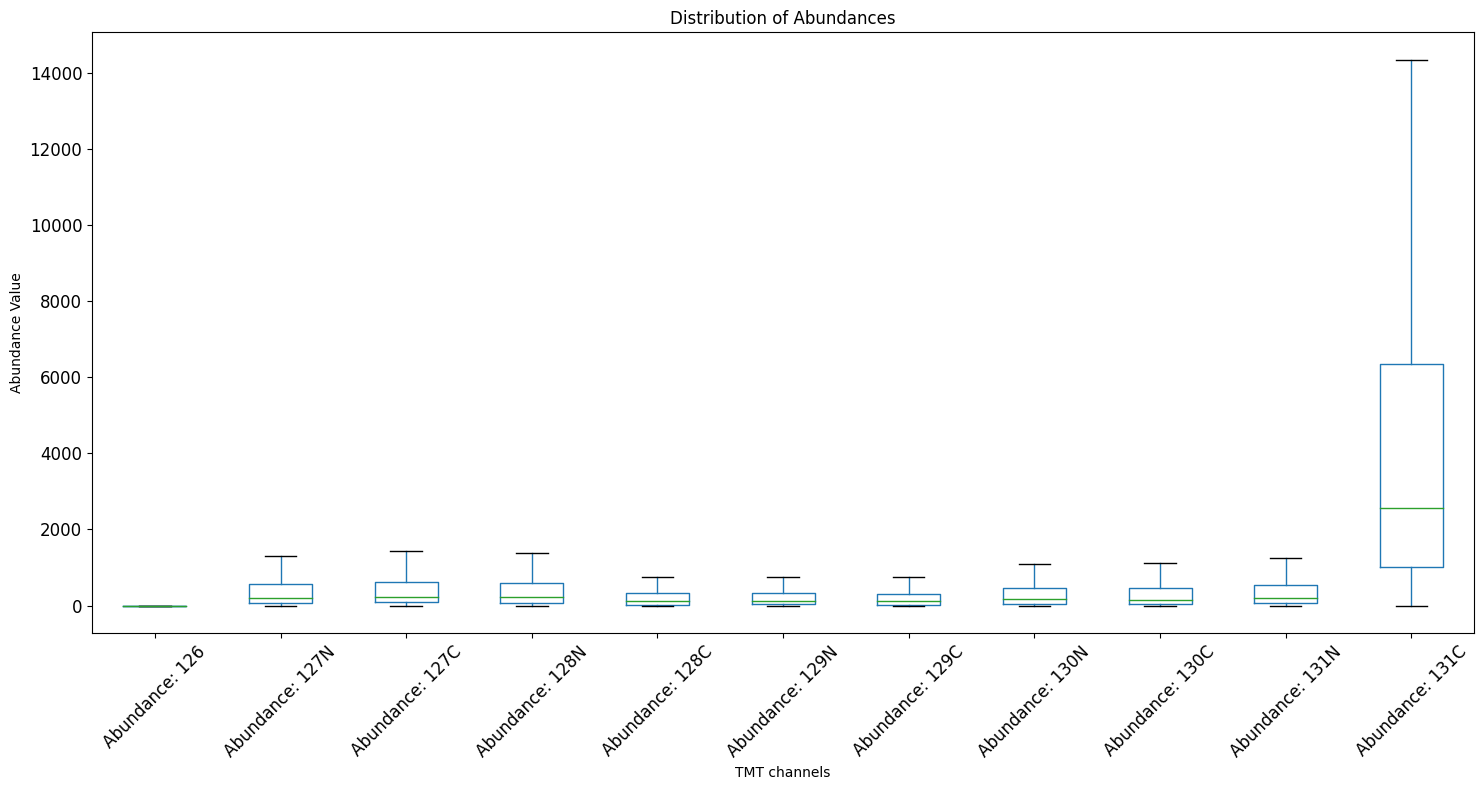

In [11]:
peptide_data = baseline_correction(heavy, random=True, threshold=5, i_baseline=0)

abundance_columns = [col for col in peptide_data.columns if 'Abundance:' in col]
abundance_df = peptide_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
print(abundance_df.head())
print(len(peptide_data))

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: baseline_correction_peptide_return
    Abundance: 126  Abundance: 127N  Abundance: 127C  Abundance: 128N  \
1              0.0       124.408310        21.361112       195.586337   
6              0.0         0.481074         0.494589         0.155058   
13             NaN              NaN              NaN              NaN   
15             NaN              NaN              NaN              NaN   
20             NaN              NaN              NaN              NaN   

    Abundance: 128C  Abundance: 129N  Abundance: 129C  Abundance: 130N  \
1        168.747363       272.893109       260.225847       263.316701   
6          0.640703        50.648092         0.613624         0.833632   
13              NaN              NaN              NaN              NaN   
15              NaN              NaN              NaN              NaN   
20              NaN              NaN              NaN              NaN   

    Abundance: 130C  Abundance: 131N  
1          0.955665     

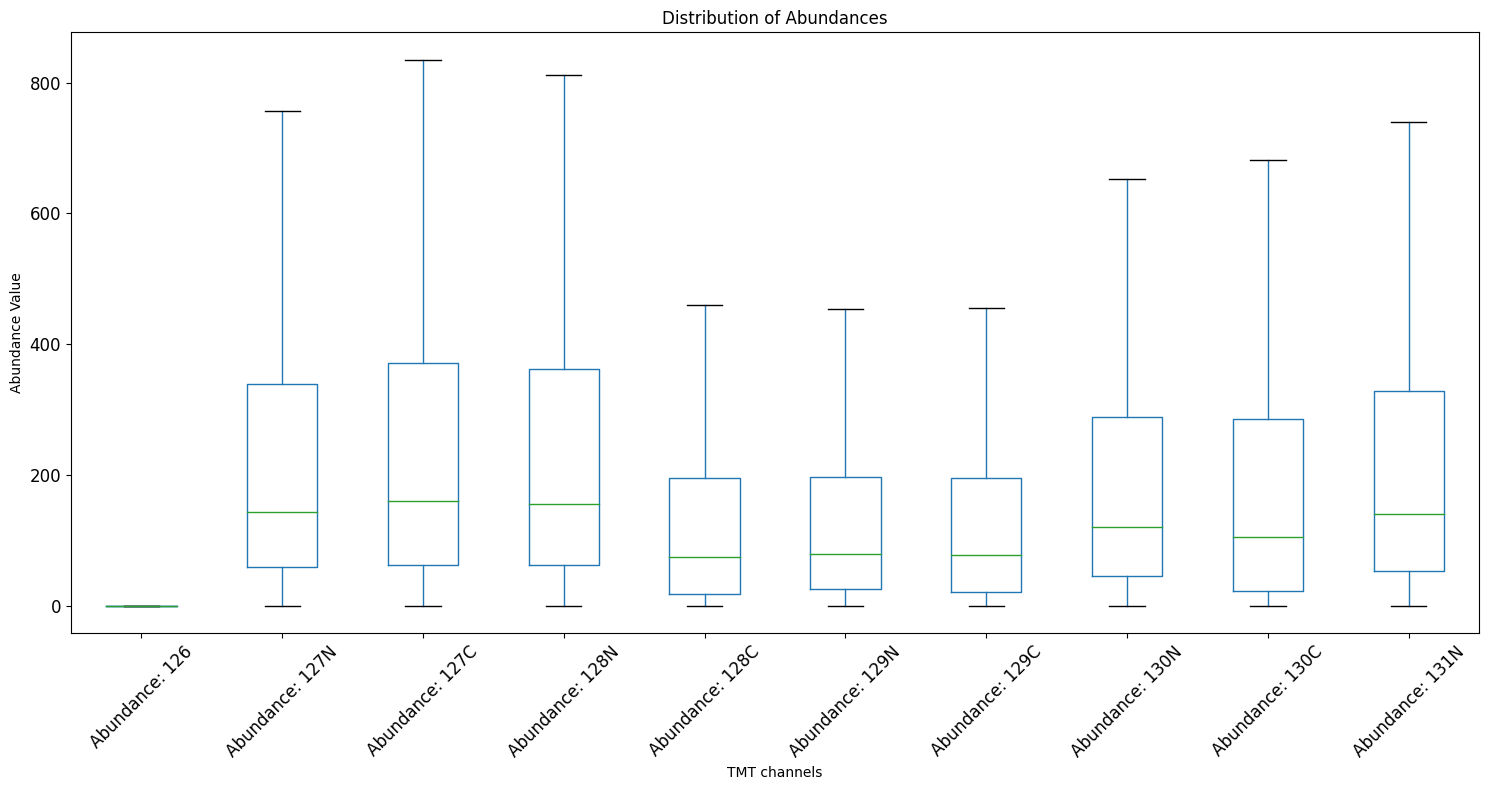

In [14]:
peptide_data = process.baseline_correction_peptide_return(heavy, random=True, threshold=5, i_baseline=0)

abundance_columns = [col for col in peptide_data.columns if 'Abundance:' in col]
abundance_df = peptide_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
print(abundance_df.head())
print(len(peptide_data))

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [154]:
for column in aggregated_df.columns:
    unique_count = aggregated_df[column].nunique()
    print(f'{column}: {unique_count} unique values')

Master Protein Accessions: 5237 unique values
Annotated Sequence: 31660 unique values
Abundance: 126: 1 unique values
Abundance: 127N: 31466 unique values
Abundance: 127C: 31429 unique values
Abundance: 128N: 31454 unique values
Abundance: 128C: 31415 unique values
Abundance: 129N: 31437 unique values
Abundance: 129C: 31427 unique values
Abundance: 130N: 31451 unique values
Abundance: 130C: 31511 unique values
Abundance: 131N: 31482 unique values


In [12]:
# LMM continue with the data newly created with composed of peptide file

def protein_rollup_sum(input_file, channels):
    '''
    This function takes Peptide level (or PSM) dataframes and performs a sum based rollup to protein level.
    the channels variable takes an array of column names that contain the quantifictions. You can create such an
    array via this command:
    channels = [col for col in PSM.columns if 'Abundance:' in col]

    mpa1 variable contains a string that is included in the Accession column. The function will search for the column containing the string
    and use it for rollup.

    Returns Protein level DF.
    '''

    mpa1 = "Master Protein Accessions"
    print('Calculate Protein quantifications from PSM')
    mpa = [col for col in input_file.columns if mpa1 in col]
    mpa = mpa[0]

    PSM_grouped = input_file.groupby(by=[mpa])
    result = {}
    for group in PSM_grouped.groups:
        temp = PSM_grouped.get_group(group)
        sums = temp[channels].sum()
        result[group] = sums

    protein_df = pd.DataFrame.from_dict(
        result, orient='index', columns=channels)
    print("Combination done")

    return protein_df

def peptide_based_lmm(input_file, conditions, drop_missing=False, techreps=None, plexes=None, norm=None, pairs=None):

    columns =  [
        "Annotated Sequence",
        "Master Protein Accessions",
        "Abundance:"
    ]
    
    pair_names = []
    channels = [col for col in input_file.columns if columns[2] in col]
    if channels == []:
        channels = [col for col in input_file.columns if 'Abundance' in col]

    if norm is not None:
        #input_file = norm(Preprocessing(self.defaults), input_file, channels)
        pass
    else:
        if drop_missing == True:
            input_file = input_file.dropna(subset=channels)
        else:
            pass
        print('No Normalization applied')
    # Protein level quantifications
    # roll = Rollup(self.defaults)
    # protein_data = roll.protein_rollup_sum(
    #     input_file=input_file, channels=channels)
    
    protein_data = protein_rollup_sum(input_file, channels)

    

    columnDict = {channels[i]: conditions[i] for i in range(len(channels))}
    protein_data = protein_data.rename(columns=columnDict)

    # Drop rows where the sum across the row (excluding 'index' column) is 0
    # this is especially important because of mePROD and basal level substraction makes 0 for entire row
    protein_data = protein_data[protein_data.sum(axis=1) != 0]

    # Prepare Peptide data for LMM
    Peptides_for_LM = input_file[channels]

    sequence = [col for col in input_file.columns if columns[0] in col]

    sequence = sequence[0]

    Peptides_for_LM['Sequence'] = input_file[sequence]

    Acc = [col for col in input_file.columns if columns[1] in col]

    Acc = Acc[0]

    Peptides_for_LM['Accession'] = input_file[Acc]

    melted_Peptides = Peptides_for_LM.melt(
        id_vars=['Accession', 'Sequence'], value_vars=channels)
    # Replace column names with conditions

    if  techreps == None:
        pass
    else:
        melted_Peptides['Techreps' ] =melted_Peptides['variable']
        melted_Peptides['Techreps'].replace(to_replace=channels,
                                            value=techreps, inplace=True)

    if plexes == None:
        pass
    else:
        melted_Peptides['Multiplex' ] =melted_Peptides['variable']
        melted_Peptides['Multiplex'].replace(to_replace=channels,
                                             value=plexes, inplace=True)

    print('Total Number of Datapoints: ', len(melted_Peptides.index))

    melted_Peptides['variable'].replace(to_replace=channels,
                                        value=conditions, inplace=True)

    if pairs != None:
        for pair in pairs:
            if pair[0][0] < pair[1][0]: # pair = ['1CDDO', '0DMSO'] pair = ['CDDO', 'DMSO'] to assing FC correctly
                decisionOfColumnName = -1
            else:
                decisionOfColumnName = 1

            print(pair, 'and decision:', decisionOfColumnName)

            temp = melted_Peptides[(melted_Peptides['variable'].str.fullmatch(pair[0])) | (
                melted_Peptides['variable'].str.fullmatch(pair[1]))]

            temp['value'] = np.log2(temp['value'])
            temp = temp.dropna()

            grouped = temp.groupby(by=['Accession'])
            result_dict = {}
            fold_changes = []
            counter = 0

            for i in grouped.groups:

                temp2 = grouped.get_group(i)

                vc = {'Sequence': '0+Sequence'}

                # Base model
                model_form = "value ~ variable"

                model = smf.mixedlm(
                    model_form, temp2, groups='Sequence', vc_formula=vc)

                try:
                    result = model.fit()
                    if counter == 0:
                        # print(model_form)
                        # print(result.summary())
                        counter = counter + 1
                    else:
                        pass

                    fc = result.params[1] * decisionOfColumnName  # CDDO and DMSO change the order 1CDDO and 1DMSO
                    pval = result.pvalues[1]

                    fold_changes.append(fc)
                    result_dict[i] = pval
                except:
                    pass

            result_df_peptides_LMM = pd.DataFrame.from_dict(
                result_dict, orient='index', columns=['p_value'])

            result_df_peptides_LMM['fold_change'] = np.array(fold_changes)

            # Multiple testing correction:
            result_df_peptides_LMM['p_value'] = result_df_peptides_LMM['p_value'].fillna(
                value=1)
            pvals = result_df_peptides_LMM['p_value'].to_numpy()

            reject, pvals_corrected, a, b = multipletests(
                pvals, method='fdr_bh')

            result_df_peptides_LMM['q_value'] = pvals_corrected

            cols = ['fold_change', 'p_value', 'q_value']  # Changing columns index
            result_df_peptides_LMM = result_df_peptides_LMM[cols]

            result_df_peptides_LMM = result_df_peptides_LMM.rename(columns={'fold_change': f'log2({pair[0]}/{pair[1]})',
                                                                            'p_value': f'p_value {pair[0]}/{pair[1]}',
                                                                            'q_value': f'q_value {pair[0]}/{pair[1]}'})

            protein_data = protein_data.join(result_df_peptides_LMM)

    return protein_data


In [19]:
peptide_data

,Master Protein Accessions,Annotated Sequence,Modifications,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N
0,A0A0B4J2D5,[K].eFHQAGkPIGLccIAPVLAAk.[V],N-Term(TMT6plex); K7(TMTK8); C12(Carbamidometh...,0.0,0.039000,0.089826,0.426018,0.073334,105.608887,7.427055,98.495786,214.619617,63.225289
2,A0A0B4J2D5,[K].eVVEAHVDQk.[N],N-Term(TMT6plex); K10(TMTK8),0.0,86.949093,88.492757,97.516335,0.560084,22.283111,9.884877,9.150296,0.275698,20.465835
3,A0A0B4J2D5,[K].iTDLANLSAANHDAAIFPGGFGAAk.[N],N-Term(TMT6plex); K25(TMTK8),0.0,925.432043,1109.456473,639.954907,236.353644,135.970699,294.068382,242.699087,532.304746,364.173297
4,A0A0B4J2D5,[K].nLSTFAVDGk.[D],N-Term(TMT6plex); K10(TMTK8),0.0,82.878906,74.555281,44.069014,0.174110,9.094634,48.829092,31.709897,0.108140,13.325217
5,A0A0B4J2D5,[R].gGAEVQIFAPDVPQMHVIDHTk.[G],N-Term(TMT6plex); K22(TMTK8),0.0,274.290313,51.196752,277.524502,325.735479,0.120929,189.727157,0.358255,207.119255,152.135020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35829,Q9Y6V7,[R].sSNTFSIk.[K],N-Term(TMT6plex); K8(TMTK8),0.0,224.618800,245.571693,175.980579,172.677912,129.713177,90.623555,252.833634,343.873445,242.488525
35830,Q9Y6W3,[K].tGPLLIELr.[G],N-Term(TMT6plex); R9(Label:13C(6)15N(4)),0.0,129.439665,111.160417,153.063101,109.130724,79.264431,74.492126,106.361861,128.442827,168.592291
35832,Q9Y6W5,[K].eEEVSLQGINTr.[K],N-Term(TMT6plex); R12(Label:13C(6)15N(4)),0.0,58.016577,3.113791,37.144137,73.254258,40.041321,9.428459,55.704264,109.607585,96.644372
35833,Q9Y6W5,[K].vTQLDPkEEEVSLQGINTr.[K],N-Term(TMT6plex); K7(TMTK8); R19(Label:13C(6)1...,0.0,28.890823,379.499523,129.305788,138.846584,87.972340,85.921471,121.238651,150.446480,37.327480


In [13]:
conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB', 'Boost']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]

resultFinal = peptide_based_lmm(peptide_data, conditions, pairs=pairs)

# resultFinal

No Normalization applied
Calculate Protein quantifications from PSM
Combination done
Total Number of Datapoints:  377498
['CCCP', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'CCCP'] and decision: 1


In [16]:
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
# resultFinal

In [17]:
resultFinal.to_excel('Result_LMM_2023_peptides_withBooster_newFunction.xlsx', index=False, engine="openpyxl")

In [ ]:
# Work on multicore whether it will be better or not!

In [ ]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def peptide_based_lmm_multicore(input_file, conditions,number_of_processes=os.cpu_count()-2,drop_missing=False, techreps=None, plexes=None, pairs=None):
    psms=input_file
    gene_list = list(set(input_file["Master Protein Accessions"]))
    n_size = round(len(gene_list)/number_of_processes)
    accession_splits = list(chunks(gene_list, n_size))
    temp_dfs = []
    for i in range(len(accession_splits)):
        temp = psms[psms["Master Protein Accessions"].isin(values=accession_splits[i])]
        temp_dfs.append(temp)
    results=[]
    unique_conditions = list(set(conditions))
    if pairs == None:
        pairs = self.tessa(unique_conditions)
    else:
        pass
    for pair in pairs:
        pair.sort()
        comparison = '_' + str(pair[1]) + '_vs_' + str(pair[0])
        self.pair_names.append(comparison)
        

    with futures.ProcessPoolExecutor(max_workers=number_of_processes) as executor:
        future_to_df = {executor.submit(self.peptide_based_lmm,df,conditions, pairs=pairs,norm=None,drop_missing=drop_missing,techreps=techreps,plexes=plexes): df for df in temp_dfs}
        counter=0
        for future in futures.as_completed(future_to_df):
            counter = counter + 1
            result = future_to_df[future]
            try:
                data = future.result()
                print(data)
                results.append(data)
            except Exception as exc:
                print(exc)
            else:
                pass

    for i in range(len(results)):
        if i == 0:
            pass
        else:
            results[0]=results[0].append(results[i])
            print(len(results[0]))
    result = results[0]
    del results, temp_dfs
    self.comparison_data = self.export_comparison_strings()
    return result

In [8]:
defaults = ms.Defaults()
hypo = ms.HypothesisTesting(defaults)
conditions=['Light','0_DMSO','0_DMSO','0_DMSO','Tg','Tg','Tg','Boost']
pairs = [['0_DMSO','Tg']]

data = hypo.peptide_based_lmm_multicore(peptide_data,conditions=conditions,pairs=pairs,drop_missing=True)

521
783
1046
1307
1567


In [10]:
print(data.columns)

Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 131N', 'p_value_Tg_vs_0_DMSO',
       'fold_change_Tg_vs_0_DMSO', 'q_value_Tg_vs_0_DMSO'],
      dtype='object')


In [11]:
data.to_excel(wd+"JS55_fractionation_LMM_results.xlsx",engine="openpyxl")